In [4]:
import pandas as pd
import numpy as np
import re
import string

data = pd.read_csv("/kaggle/input/crftrain200/training.csv")

In [5]:
data = data.fillna(method="ffill")

In [6]:
# df1 = pd.DataFrame({ "Sentence #":['Sentence: 47960']*6, 
#                     "Word":['my', 'name', 'is', 'abhishek', 'kumar','.'],  
#                     "POS":[None]*6,
#                     "Tag":['O','O','O','B-per','I-per','O']})
# df2 = pd.DataFrame({ "Sentence #":['Sentence: 47961']*7, 
#                     "Word":['my', 'name', 'is', 'ritik', 'kumar','gupta','.'],  
#                     "POS":[None]*7,
#                     "Tag":['O','O','O','B-per','I-per','I-per','O']})

In [7]:
# data=data.append(df1)
# data=data.append(df2)

In [8]:
data.tail()

,Sentence_Index,Token,Tag
191892,15299,প্রথম,O
191893,15299,দরগৌদ,B-CORP
191894,15299,দ্বারা,O
191895,15299,প্রকাশিত,O
191896,15299,হয়েছিল।,O


In [9]:
data.head(20)

,Sentence_Index,Token,Tag
0,0,তার,O
1,0,মৃত্যুর,O
2,0,দশ,O
3,0,দিন,O
4,0,"পর,",O
5,0,১১৫,O
6,0,কৃষ্ণাঙ্গ,O
7,0,উচ্চ,O
8,0,বিদ্যালয়ের,O
9,0,শিক্ষার্থীরা,O


In [10]:
words = list(set(data["Token"].values))
words.append("ENDPAD")
n_words = len(words); n_words

33186

In [11]:
tags = list(set(data["Tag"].values))
n_tags = len(tags); 

In [12]:
tags

['I-PER',
 'I-CORP',
 'O',
 'I-PROD',
 'B-CW',
 'B-PROD',
 'B-CORP',
 'I-CW',
 'B-PER',
 'I-LOC',
 'I-GRP',
 'B-GRP',
 'B-LOC']

In [14]:
class SentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w,t in zip(s["Token"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence_Index").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["{}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [15]:
getter = SentenceGetter(data)

In [16]:
sent = getter.get_next()

In [17]:
print(sent)

None


In [18]:
sentences = getter.sentences
print(sentences[0])

[('তার', 'O'), ('মৃত্যুর', 'O'), ('দশ', 'O'), ('দিন', 'O'), ('পর,', 'O'), ('১১৫', 'O'), ('কৃষ্ণাঙ্গ', 'O'), ('উচ্চ', 'O'), ('বিদ্যালয়ের', 'O'), ('শিক্ষার্থীরা', 'O'), ('তার', 'O'), ('হত্যার', 'O'), ('প্রতিবাদে', 'O'), ('ম্যাককম্ব', 'B-LOC'), ('এর', 'O'), ('মাধ্যমে', 'O'), ('মিছিল', 'O'), ('করেছে।', 'O')]


## SO FAR HOISE 1 

## Prepare the data
Now we introduce dictionaries of words and tags.

In [19]:
max_len = 75
word2idx = {w: i + 1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [20]:
print(list(word2idx.keys())[0:5])

['প্রয়োজন', 'শুলৎস্য', 'পিতাকে', 'অ্যাগমাটিন', 'সাইমরু']


In [21]:
len(word2idx), len(tag2idx)

(33186, 13)

In [22]:
from keras.preprocessing.sequence import pad_sequences

# pad the sequence
X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=n_words-1)

Using TensorFlow backend.


In [23]:
X[0]

array([26773, 19416, 24547, 25588,  5555, 18373, 25783,   658, 17311,
       17788, 26773, 23709, 32879, 19207, 30240, 14798,  8699, 14721,
       33185, 33185, 33185, 33185, 33185, 33185, 33185, 33185, 33185,
       33185, 33185, 33185, 33185, 33185, 33185, 33185, 33185, 33185,
       33185, 33185, 33185, 33185, 33185, 33185, 33185, 33185, 33185,
       33185, 33185, 33185, 33185, 33185, 33185, 33185, 33185, 33185,
       33185, 33185, 33185, 33185, 33185, 33185, 33185, 33185, 33185,
       33185, 33185, 33185, 33185, 33185, 33185, 33185, 33185, 33185,
       33185, 33185, 33185], dtype=int32)

In [24]:
len(X[0])

75

In [25]:
# pad the target
y = [[tag2idx[w[1]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])

In [26]:
len(y[0])

75

In [27]:
y[0]

array([ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, 12,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2], dtype=int32)

In [28]:
# !pip --version

In [29]:
from keras.utils import to_categorical
y = [to_categorical(i, num_classes=n_tags) for i in y]
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1)

In [30]:
y[0]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 

In [31]:
X_tr[0].shape

(75,)

In [32]:
y_tr[0].shape

(75, 13)

## Setup the CRF-LSTM
Now we can fit a LSTM-CRF network with an embedding layer.



In [33]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-wmc4k211
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-wmc4k211
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101065 sha256=f6d728e0114d5ae47850d80cda3dbbb754f56f1525102b1a94e5836375f6ae0f
  Stored in directory: /tmp/pip-ephem-wheel-cache-nox54us9/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [34]:
from keras.models import Model, Input,Sequential
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from keras_contrib.layers import CRF
import keras as k

In [35]:
print(k.__version__)

2.3.1


In [36]:
model = Sequential()
model.add(Embedding(input_dim=n_words+1, output_dim=200, input_length=max_len))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(units=128, return_sequences=True, recurrent_dropout=0.1)))
model.add(TimeDistributed(Dense(n_tags, activation="relu")))
crf_layer = CRF(n_tags)
model.add(crf_layer)

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 75, 200)           6637400   
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 200)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 75, 256)           336896    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 75, 13)            3341      
_________________________________________________________________
crf_1 (CRF)                  (None, 75, 13)            377       
Total params: 6,978,014
Trainable params: 6,978,014
Non-trainable params: 0
_________________________________________________________________


In [38]:
# adam = k.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)
model.compile(optimizer='adam', loss=crf_layer.loss_function, metrics=[crf_layer.accuracy])

/opt/conda/lib/python3.6/site-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/opt/conda/lib/python3.6/site-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


In [39]:
len(X_tr)

13770

In [40]:
len(y_tr)

13770

In [41]:
X_tr[0].shape

(75,)

In [42]:
y_tr[0].shape

(75, 13)

In [43]:
# history = model.fit(X_tr, np.array(y_tr), batch_size=128, epochs=5,
#                     validation_split=0.1, verbose=1)


history = model.fit(X_tr,np.array(y_tr), batch_size=128, epochs=40,
                    validation_split=0.2, verbose=1)

/opt/conda/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 11016 samples, validate on 2754 samples
Epoch 1/40
11016/11016 [==============================] - 20s 2ms/step - loss: 0.3114 - crf_viterbi_accuracy: 0.9717 - val_loss: 0.1290 - val_crf_viterbi_accuracy: 0.9729
Epoch 2/40
11016/11016 [==============================] - 19s 2ms/step - loss: 0.1222 - crf_viterbi_accuracy: 0.9722 - val_loss: 0.1137 - val_crf_viterbi_accuracy: 0.9729
Epoch 3/40
11016/11016 [==============================] - 17s 2ms/step - loss: 0.1022 - crf_viterbi_accuracy: 0.9723 - val_loss: 0.0930 - val_crf_viterbi_accuracy: 0.9729
Epoch 4/40
11016/11016 [==============================] - 18s 2ms/step - loss: 0.0792 - crf_viterbi_accuracy: 0.9730 - val_loss: 0.0772 - val_crf_viterbi_accuracy: 0.9740
Epoch 5/40
11016/11016 [==============================] - 18s 2ms/step - loss: 0.0632 - crf_viterbi_accuracy: 0.9743 - val_loss: 0.0690 - val_crf_viterbi_accuracy: 0.9750
Epoch 6/40
11016/11016 [==============================] - 18s 2ms/step - loss: 0.0487 - crf_vite

In [44]:
hist = pd.DataFrame(history.history)

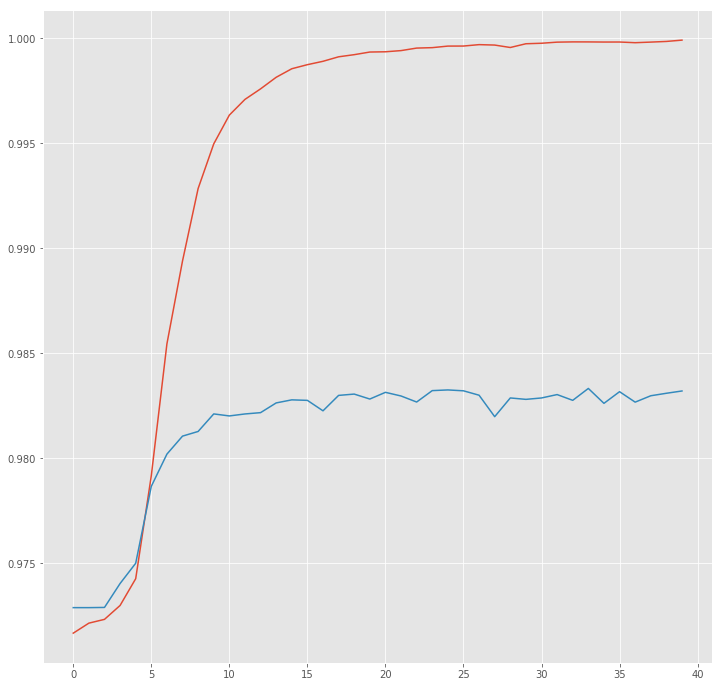

In [45]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(figsize=(12,12))
plt.plot(hist["crf_viterbi_accuracy"])
plt.plot(hist["val_crf_viterbi_accuracy"])
plt.show()

In [46]:
!pip install seqeval

     |████████████████████████████████| 51kB 829kB/s eta 0:00:01
  Created wheel for seqeval: filename=seqeval-1.2.2-cp36-none-any.whl size=16172 sha256=34e3bfde7aa06829fedd002d5fa3faf0a4f2ecca102746deaf864f101a9cebe0
  Stored in directory: /root/.cache/pip/wheels/52/df/1b/45d75646c37428f7e626214704a0e35bd3cfc32eda37e59e5f
Successfully built seqeval


In [47]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report

In [48]:
test_pred = model.predict(X_te, verbose=1)

1530/1530 [==============================] - 2s 1ms/step


In [49]:
idx2tag = {i: w for w, i in tag2idx.items()}

def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i].replace("PAD", "O"))
        out.append(out_i)
    return out
    
pred_labels = pred2label(test_pred)
test_labels = pred2label(y_te)

In [50]:
print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))


F1-score: 42.4%


In [51]:
print(classification_report(test_labels, pred_labels))

              precision    recall  f1-score   support

        CORP       0.47      0.43      0.45       256
          CW       0.18      0.27      0.22       228
         GRP       0.57      0.49      0.53       245
         LOC       0.52      0.42      0.47       241
         PER       0.55      0.41      0.47       255
        PROD       0.45      0.46      0.46       305

   micro avg       0.43      0.42      0.42      1530
   macro avg       0.46      0.41      0.43      1530
weighted avg       0.46      0.42      0.43      1530



In [52]:
model.evaluate(X_te, np.array(y_te))

1530/1530 [==============================] - 2s 2ms/step


[0.07130621700894599, 0.983074963092804]

# END run1

In [ ]:
# # Custom Tokenizer
# re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
# def tokenize(s): return re_tok.sub(r' \1 ', s).split()

In [ ]:
# test_sentence="In the context of prehistory, antiquity and contemporary indigenous peoples, the title may refer to tribal kingship. Germanic kingship is cognate with Indo-European traditions of tribal rulership (c.f. Indic rājan, Gothic reiks, and Old Irish rí, etc.)."
# x_test_sent = pad_sequences(sequences=[[word2idx.get(w, 0) for w in tokenize(test_sentence)]],
#                             padding="post", value=0, maxlen=max_len)

In [ ]:
# p = model.predict(np.array([x_test_sent[0]]))
# p = np.argmax(p, axis=-1)
# print("{:15}||{}".format("Word", "Prediction"))
# print(30 * "=")
# for w, pred in zip(tokenize(test_sentence), p[0]):
#     print("{:15}: {:5}".format(w, tags[pred]))

In [63]:
# our code start from here...............................................................
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Bidirectional
from numpy import array
import spacy
import pandas as pd
import random


#from config import *
lstm_unit=64
epochs=10
loss='categorical_crossentropy'
optimizer='adam'
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
sentence="Perfect your shooting skills with the Spalding Back Atcha Ball Return Training Aid. Designed with solo practice days in mind, this training aid attaches to your rim and serves the ball right back to you after your shot goes down.THE ATKINS MISSION. Atkins’ purpose is to improve global health and to help people understand that eating right is about both losing weight and becoming healthy. That’s done through the use of imagination, innovation, partnerships and commitment to science to make it easy to eat right. VANILLA LATTE SHAKE. Atkins protein shakes help support your low carb lifestyle without compromising flavor. Made with real instant coffee and sweet vanilla flavor, this gluten free iced coffee shake delivers the boost and flavor you crave with none of the guilt. For a quick breakfast or a mid-day recharge, reach for this keto-friendly** shake to satisfy hunger. **When used with Atkins ketogenic programs WHAT’S INSIDE. Let this rich and creamy shake delight your taste buds while delivering essential vitamins and minerals and as much caffeine as a cup of coffee*. Includes 3 packs, each with 4 ready-to-drink 11 oz shakes with 15 grams of high-quality protein, 5 grams of fiber, 4 grams of net carbs and 1 gram of sugar per serving. *Caffeine content per shake as compared to a standard 8 fl oz cup of brewed coffee EAT RIGHT. NOT LESS. Cardiologist Dr. Robert C. Atkins saw that eating right, not less, improved his patients’ health - not just in terms of weight loss but also reducing chronic issues. Over the last 45 years, mounting evidence is revealing that Dr. Atkins was right. PUBLIC HEALTH ADVOCACY. The “Atkins Diet” started as a fad, but quickly became a counter-conventional movement that reset people’s understanding of nutrition and weight loss, and its link to health. Atkins public health advocacy has played a significant role in updating dietary guidelines, moving them from less and towards right."

nlp = spacy.load('en_core_web_sm')
model_emb = hub.load(module_url)
sentences = [str(i) for i in nlp(sentence).sents]
y=array([random.randint(0,1) for i in range(len(sentences))])

In [64]:
from keras.preprocessing.sequence import pad_sequences
max_len=75
embedding=40
unique_words=set()
for sen in sentences:
    words=sen.split(" ")
    words=set(words)
    unique_words=unique_words.union(words)

word2inx={i:j+1 for j, i in enumerate(unique_words)}

X = [[word2inx[w] for w in s.split(" ")] for s in sentences]
X = pad_sequences(maxlen = max_len, sequences = X, padding = "post", value = len(word2inx)+1)
y_label=[[random.randint(0,1) for i in range(75)] for j in range(25)]
X=array(X)

In [65]:
model = Sequential()
model.add(Embedding(input_dim = 75, output_dim = embedding, input_length = max_len))
model.add(Bidirectional(LSTM(units = 50, return_sequences=True, recurrent_dropout=0.1)))
model.add(Bidirectional(LSTM(units = 50, return_sequences=True, recurrent_dropout=0.1)))
model.add(TimeDistributed(Dense(50, activation="relu")))
crf_layer = CRF(2)
model.add(crf_layer)
model.compile(optimizer='adam', loss=crf_layer.loss_function, metrics=[crf_layer.accuracy])

model.summary()


/opt/conda/lib/python3.6/site-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/opt/conda/lib/python3.6/site-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 75, 40)            3000      
_________________________________________________________________
bidirectional_2 (Bidirection (None, 75, 100)           36400     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 75, 100)           60400     
_________________________________________________________________
time_distributed_2 (TimeDist (None, 75, 50)            5050      
_________________________________________________________________
crf_2 (CRF)                  (None, 75, 2)             110       
Total params: 104,960
Trainable params: 104,960
Non-trainable params: 0
_________________________________________________________________


In [66]:
y = [to_categorical(i, num_classes=2) for i in y_label]
y_label=array(y).reshape(25,75,2)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim = 75, output_dim = embedding, input_length = max_len))
model.add(Bidirectional(LSTM(units = 50, return_sequences=True, recurrent_dropout=0.1)))
model.add(Bidirectional(LSTM(units = 50, return_sequences=True, recurrent_dropout=0.1)))
model.add(TimeDistributed(Dense(50, activation="relu")))
crf_layer = CRF(2)
model.add(crf_layer)
model.compile(optimizer='adam', loss=crf_layer.loss_function, metrics=[crf_layer.accuracy])

model.summary()


In [67]:
crf_layer.loss_function

<function keras_contrib.losses.crf_losses.crf_loss(y_true, y_pred)>

In [68]:
y_label.shape

(25, 75, 2)

In [69]:
model.fit(X,y_label, epochs=10)

/opt/conda/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/10
25/25 [==============================] - 3s 126ms/step - loss: 0.8002 - crf_viterbi_accuracy: 0.4933
Epoch 2/10
25/25 [==============================] - 0s 12ms/step - loss: 0.7984 - crf_viterbi_accuracy: 0.4933
Epoch 3/10
25/25 [==============================] - 0s 13ms/step - loss: 0.7967 - crf_viterbi_accuracy: 0.4933
Epoch 4/10
25/25 [==============================] - 0s 12ms/step - loss: 0.7957 - crf_viterbi_accuracy: 0.5040
Epoch 5/10
25/25 [==============================] - 0s 12ms/step - loss: 0.7956 - crf_viterbi_accuracy: 0.5067
Epoch 6/10
25/25 [==============================] - 0s 13ms/step - loss: 0.7954 - crf_viterbi_accuracy: 0.5067
Epoch 7/10
25/25 [==============================] - 0s 12ms/step - loss: 0.7947 - crf_viterbi_accuracy: 0.5067
Epoch 8/10
25/25 [==============================] - 0s 12ms/step - loss: 0.7938 - crf_viterbi_accuracy: 0.5067
Epoch 9/10
25/25 [==============================] - 0s 12ms/step - loss: 0.7932 - crf_viterbi_accuracy: 0.5067
